# Why it's interesting to look at Quantum Kernels

$\blacktriangleright$ This is the **2nd** part of a notebook series demonstrating the functionality of the <code>QMLab</code> package.

[Part 1](./01_classical_kernel_methods.ipynb)  &nbsp;  &nbsp; 
[Part 3](./training_quantum_kernels.ipynb)

Quantum Kernels are functions of the form
$$
\kappa(\boldsymbol{x}, \boldsymbol{x}') = \left| \Braket{\psi(\boldsymbol{x}')| \psi(\boldsymbol{x}) }\right|^2,
$$
where one uses $\hat{\phi} : \boldsymbol{x} \longrightarrow \Ket{\psi(\boldsymbol{x})}$ a *data embedding* that maps feature vectors to a higher dimensional 
hilbert space $\mathcal{H}$.

In [10]:
from qmlab.data_generation import generate_random_data
from qmlab.plotting import plot_2d_data_with_train_test_split, plot_decision_boundaries, set_plot_style
from qmlab.kernel import FidelityQuantumKernel, QSVC
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# fix seed for reproducability
random_state = 12345

%matplotlib inline
plt.rcParams["figure.dpi"] = 100
set_plot_style("dark_background")

We generate uniformly distributed feature vectors in the interval $[-\pi/2, + \pi / 2]$.

Such that $\bm{X}^\text{train} \in \mathbb{R}^{40 \times 2}$ and $\bm{y}^\text{train} \in \mathbb{R}^{1 \times 40}$ 
and $\bm{X}^\text{test} \in \mathbb{R}^{5 \times 2}$ and $\bm{y}^\text{test} \in \mathbb{R}^{1 \times 5}$. 

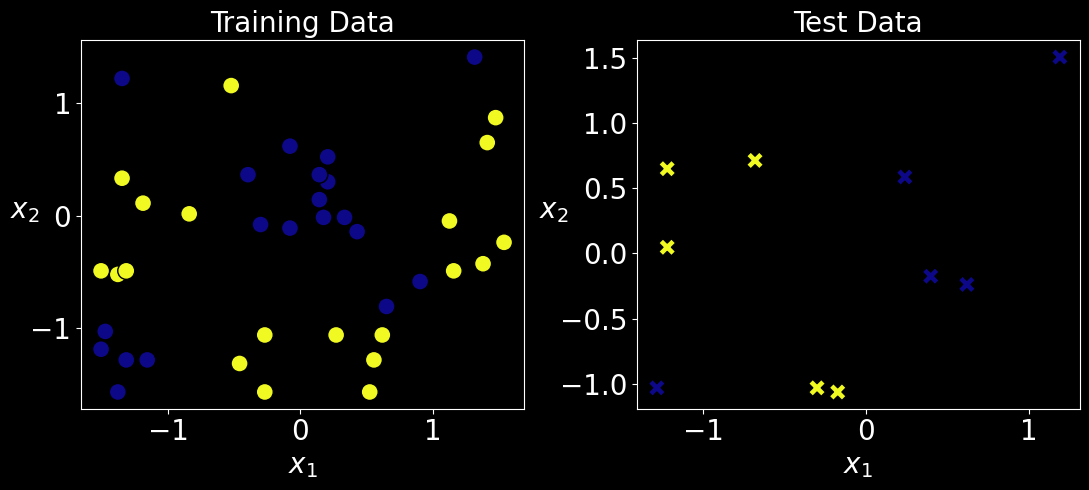

In [11]:
X_train, y_train, X_test, y_test = generate_random_data(
    feature_dimension=2,
    training_examples_per_class=20,
    test_examples_per_class=5,
    delta=0.3,
    random_state=random_state,
    interval=(-np.pi / 2, np.pi / 2),
)  # this creates uniformly sampled feature vectors [-np.pi / 2, np.pi/2]^2 with corresponding labels in [-1, +1]

plot_2d_data_with_train_test_split(
    X_train, y_train, X_test, y_test, separate_plots=True
)

Here we use the accuracy (ACC) to measure our performance on classification:

$$ \text{ACC}(h_{\bm{\theta}}(\boldsymbol{x}), \boldsymbol{y}) = \frac{1}{m} \sum_{j=1}^m 
I[h(x_j) = y_j], \qquad \text{where} \qquad 
h(\boldsymbol{x}), \boldsymbol{y} \in \mathbb{R}^{1 \times m}.$$

In [12]:
svm = SVC(kernel="rbf", random_state=random_state)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8

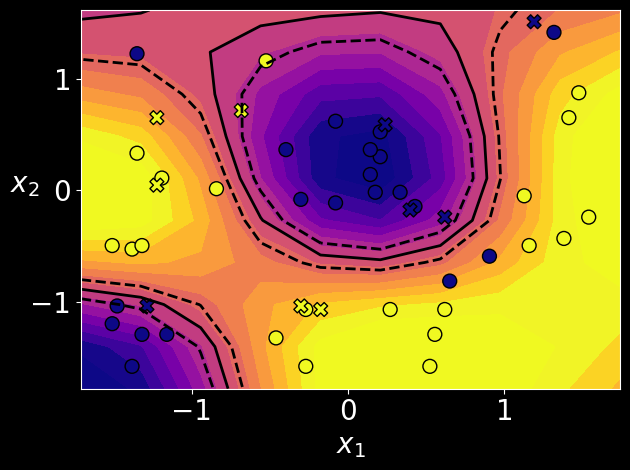

In [13]:
plot_decision_boundaries(svm, X_train, y_train, X_test, y_test)

In [14]:
qkernel = FidelityQuantumKernel(data_embedding="IQP", jit=True, reps=2)
qsvm = QSVC(quantum_kernel=qkernel, random_state=random_state)
qsvm.fit(X_train, y_train)
qsvm.score(X_test, y_test) 

1.0

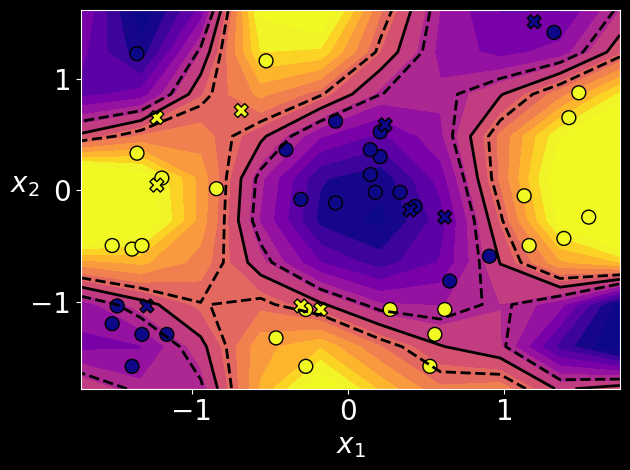

In [15]:
plot_decision_boundaries(qsvm, X_train, y_train, X_test, y_test)

In [16]:
X_train, y_train, X_test, y_test = generate_random_data(
    feature_dimension=4,
    training_examples_per_class=20,
    test_examples_per_class=5,
    delta=0.3,
    random_state=random_state,
)
X_train.shape

(40, 4)

In [17]:
svm = SVC(kernel="rbf", random_state=random_state)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.6

In [18]:
qkernel = FidelityQuantumKernel(data_embedding="IQP", jit=True, reps=2)
qsvm = QSVC(quantum_kernel=qkernel, random_state=random_state)
qsvm.fit(X_train, y_train)
qsvm.score(X_test, y_test) 

0.6